In [8]:
import numpy as np # library to do a lot of linear operations on any matrix (n-d array)
import pandas as pd # pd.read_csv()
import matplotlib.pyplot as plt # plotting 
import seaborn as sns # plotting library for beautiful plots
from sklearn.datasets import load_iris # scikit learn --> all ML alogirthms reside here and a few datasets also. 
from sklearn.model_selection import train_test_split # 
from sklearn.linear_model import LogisticRegression # picking up the model so that we dont have to make one
from sklearn.metrics import accuracy_score, confusion_matrix # 

In [16]:
# Load the Iris dataset
print("=== 1. Loading the Iris Dataset ===")
iris = load_iris()
X = iris.data # X is always and always our input
y = iris.target # y is always our output
feature_names = iris.feature_names
target_names = iris.target_names


=== 1. Loading the Iris Dataset ===


In [ ]:
target_names

In [28]:
# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names) # pandas always works on something known as dataframes
df['species'] = [target_names[i] for i in y]

print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset shape:", X.shape)
print("Features:", feature_names)
print("Target classes:", target_names)




First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']



=== 2. Visualizing the Data ===


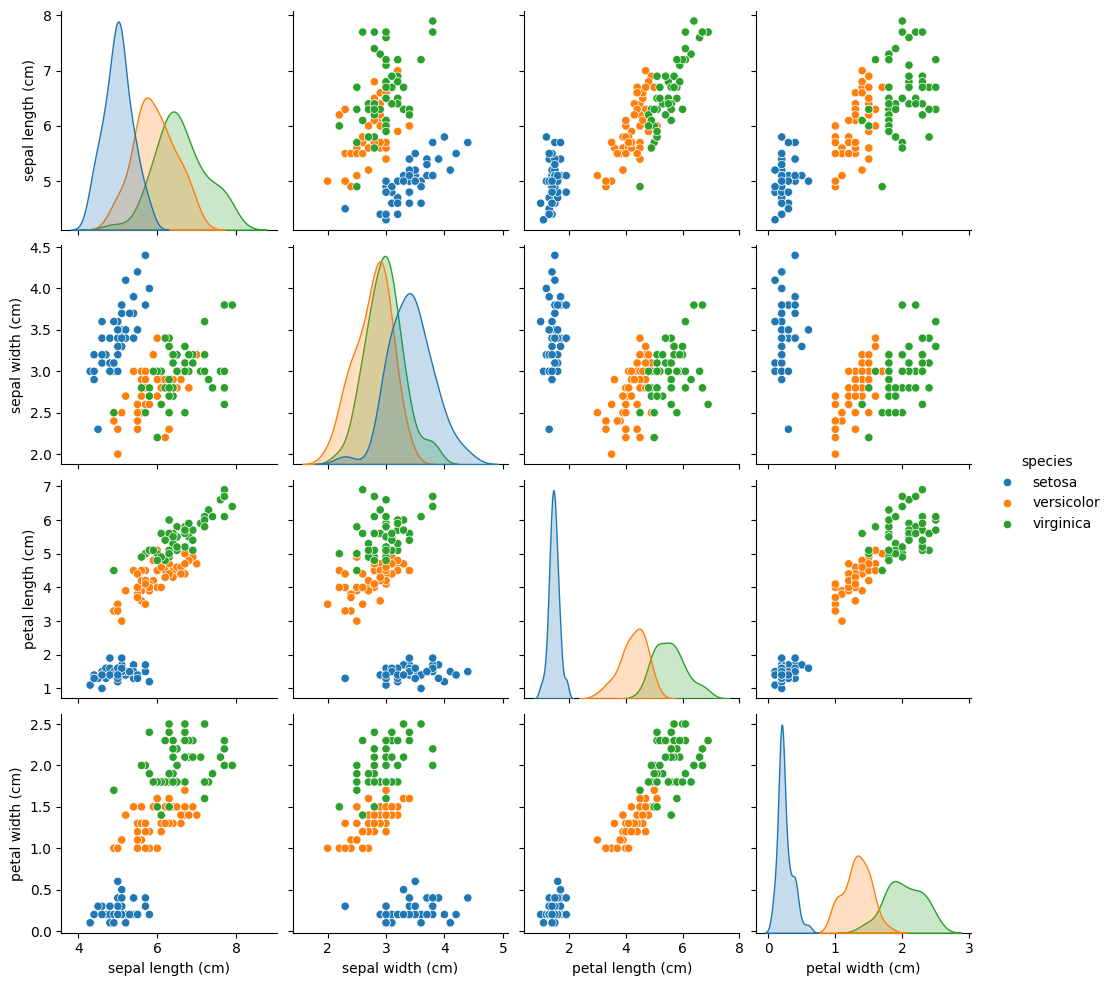

In [99]:
# Visualize the data
print("\n=== 2. Visualizing the Data ===")
#plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species')
#plt.suptitle('Pair Plot of Iris Features', y=1.02)
#plt.tight_layout()
plt.show()



In [53]:
# Split the data
print("\n=== 3. Preparing Data for Training ===")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


=== 3. Preparing Data for Training ===
Training set size: 120 samples
Testing set size: 30 samples


In [83]:
model = LogisticRegression(max_iter=100)

In [84]:
model.fit(X_train, y_train)

LogisticRegression()

In [85]:
# Train the model
print("\n=== 4. Training the Classifier ===")
print("Using Logistic Regression, which is a simple but powerful classification algorithm.")
#model = LogisticRegression(max_iter=1000)
#model.fit(X_train, y_train)
print("Model training completed!")



=== 4. Training the Classifier ===
Using Logistic Regression, which is a simple but powerful classification algorithm.
Model training completed!


In [86]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [87]:
y_test_predicted_by_model = model.predict(X_test)

In [88]:
y_test_predicted_by_model

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [92]:
accuracy_score(y_test_predicted_by_model, y_test)

1.0

In [19]:
testing_accuracy = np.mean(model.predict(X_test) == y_test) * 100 



training_accuracy = np.mean(model.predict(X_train) == y_train) * 100 ## redundant, why ?? 


In [21]:
testing_accuracy

np.float64(100.0)

In [95]:
# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")



Model Accuracy: 1.00



=== 5. Model Performance ===


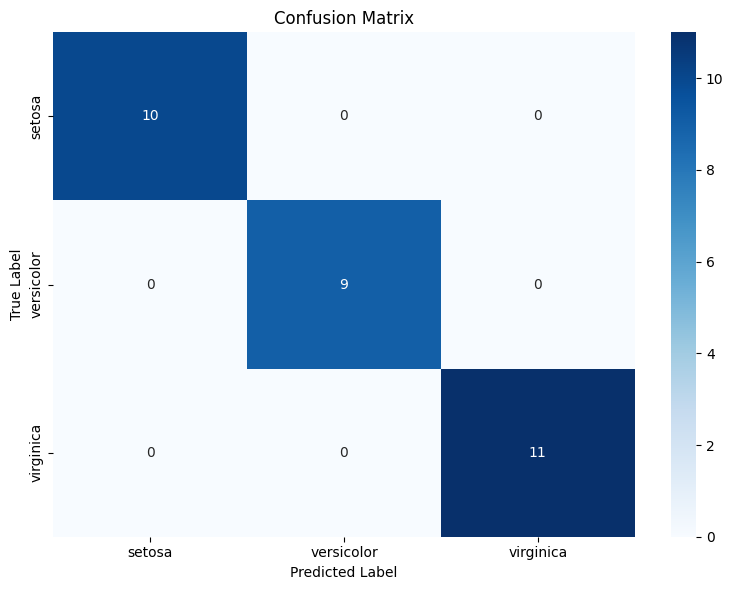

In [96]:
# Show confusion matrix
print("\n=== 5. Model Performance ===")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names,
                yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

plt.show()


=== 6. Feature Importance ===


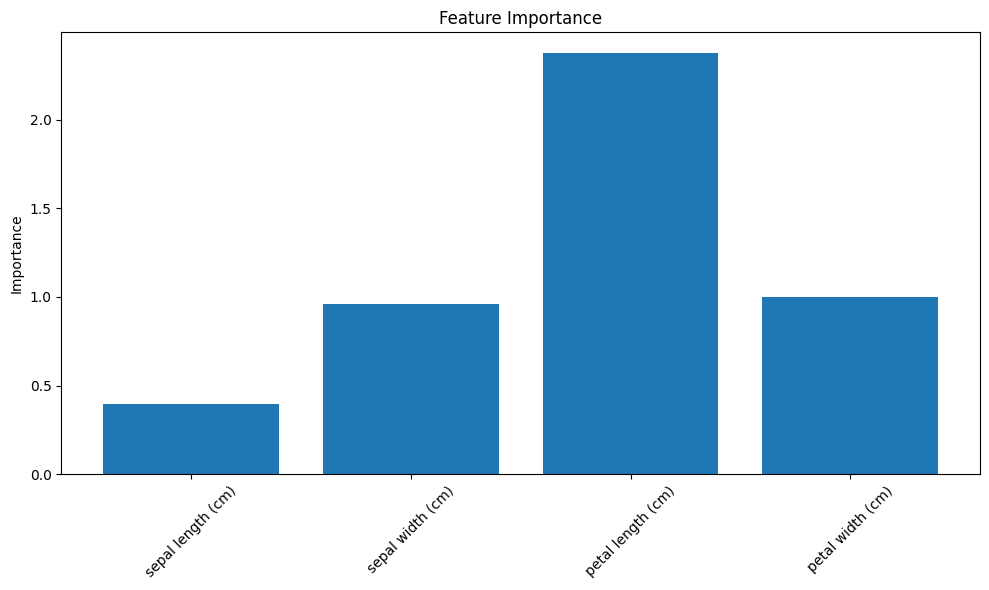

In [97]:
# Show feature importance
print("\n=== 6. Feature Importance ===")
importance = np.abs(model.coef_[0])
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importance)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
